# Email Spam Detection



## Structure of the Notebook

Ricardo Escarcega and Martin Batu


1. **Introduction and Objective:** 



2. **Data Description:** 

*Provide an overview of the dataset, including its source and characteristics.*


In [ ]:
# code describing the data goes here, as applicable

3. **Data Preprocessing:** 

*Detail the steps taken to prepare the data for analysis, including cleaning and feature engineering*


[nltk_data] Downloading package stopwords to /Users/rix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rix/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rix/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/rix/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Missing values per column:
 Body     1
Label    0
dtype: int64
                                                Body  \
0  \nSave up to 70% on Life Insurance.\nWhy Spend...   
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...   
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...   
3  ##############################################...   
4  I thought you might like these:\n1) Slim Down ...   

                                      Processed_Body  
0  save life insurance spend tolife quote saving ...  
1  fight risk cancer httpwwwadclickwspcfmospk sli...  
2  fight risk cancer httpwwwadclickwspcfmospk sli...  
3  adult club offer free membership instant acces...  
4  thought might like slim guaranteed lose day ht...  


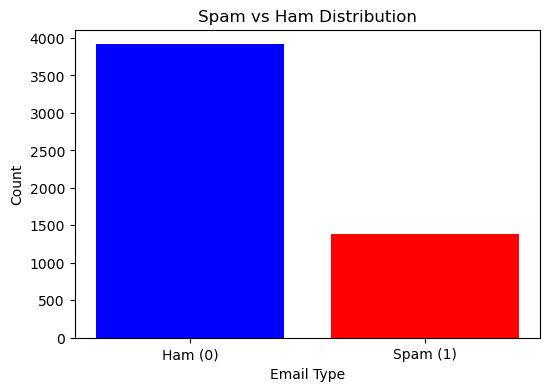

Ham count:  3915
Spam count:  1378
Top spam words:  [('email', 3077), ('free', 1926), ('business', 1396), ('click', 1368), ('get', 1347), ('money', 1311), ('address', 1223), ('order', 1120), ('people', 1038), ('report', 980), ('information', 950), ('make', 919), ('program', 916), ('name', 879), ('send', 862), ('day', 774), ('grant', 735), ('company', 730), ('offer', 715), ('receive', 713)]
Top ham words:  [('get', 2292), ('would', 1967), ('email', 1902), ('like', 1890), ('message', 1792), ('file', 1646), ('dont', 1620), ('user', 1560), ('wrote', 1547), ('linux', 1521), ('people', 1511), ('group', 1465), ('system', 1396), ('work', 1394), ('make', 1393), ('also', 1317), ('information', 1292), ('way', 1223), ('know', 1144), ('said', 1135)]


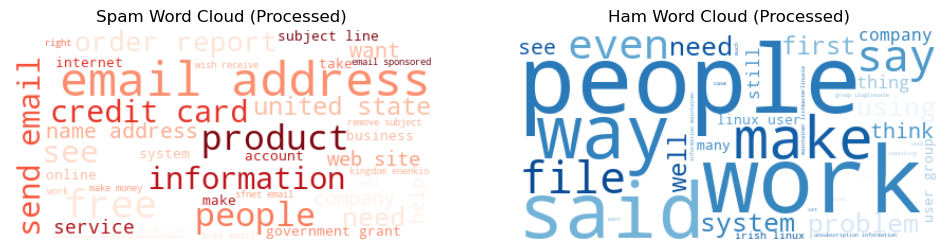

Original: 
Save up to 70% on Life Insurance.
Why Spend More Than You Have To?Life Quote Savings
Ensuring your 
      family's financial security is very important. Life Quote Savings makes 
      buying life insurance simple and affordable. We Provide FREE Access to The 
      Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and 
            SAVES you money! Let us help you get started with the best values in 
            the country on new coverage. You can SAVE hundreds or even thousands 
            of dollars by requesting a FREE quote from Lifequote Savings. Our 
            service will take you less than 5 minutes to complete. Shop and 
            compare. SAVE up to 70% on all types of Life insurance! Click Here For Your 
            Free Quote!Protecting your family is the best investment you'll ever 
          make!
If you are in receipt of this email 
      in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE REMOVE. If you 


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter 
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import unicodedata

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    try:
        # Normalize encoding issues
        text = unicodedata.normalize("NFKD", text)

        # Lowercase text
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r"[^a-z\s]", "", text)

        # Tokenize words
        words = word_tokenize(text)

        # Remove stopwords
        words = [word for word in words if word not in stop_words]

        # Lemmatize words
        words = [lemmatizer.lemmatize(word) for word in words]

        # Remove short words (length 2 or less)
        words = [word for word in words if len(word) > 2]

        # Remove unwanted common words
        remove_words = {"aaa", "aa", "one", "new", "please", "use", "may", "time", "list", "mailing"}
        words = [word for word in words if word not in remove_words]

        return " ".join(words)
    
    except Exception as e:
        print(f"Error processing text: {text[:100]}...")
        print(f"Error: {e}")
        return ""  # Return empty string for problematic rows

# ✅ Now you can load and preprocess data
df = pd.read_csv("hamspam.csv", encoding="latin1")

# Drop unnecessary column
df_cleaned = df.drop(columns=["Unnamed: 0"])

# Check for duplicates and remove them
df_cleaned = df_cleaned.drop_duplicates()

# Check for missing values
print("Missing values per column:\n", df_cleaned.isnull().sum())

# Remove rows with missing values
df_cleaned = df_cleaned.dropna(subset=["Body"])

# Apply function to dataset AFTER it's defined
df_cleaned["Processed_Body"] = df_cleaned["Body"].astype(str).apply(preprocess_text)

# Verify processing
print(df_cleaned[["Body", "Processed_Body"]].head())

# Count the number of spam and ham emails
label_counts = df_cleaned["Label"].value_counts()

# Plot the distribution 
plt.figure(figsize=(6, 4))
plt.bar(["Ham (0)", "Spam (1)"], label_counts, color=["blue", "red"])
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.title("Spam vs Ham Distribution")
plt.show()

# Print Counts
print("Ham count: ", label_counts[0])
print("Spam count: ", label_counts[1])

# Function to get most common words
def get_top_words(text_list, num_words=20):
    all_words = " ".join(text_list).split()  # Now uses Processed_Body
    return Counter(all_words).most_common(num_words)

# Separate spam and ham emails
spam_words = df_cleaned[df_cleaned["Label"] == 1]["Processed_Body"].dropna().tolist()
ham_words = df_cleaned[df_cleaned["Label"] == 0]["Processed_Body"].dropna().tolist()

# Get top words
top_spam_words = get_top_words(spam_words)
top_ham_words = get_top_words(ham_words)

# Display results
print("Top spam words: ", top_spam_words)
print("Top ham words: ", top_ham_words)

# Word Clouds
plt.figure(figsize=(12,6))

# Spam Word Cloud
plt.subplot(1, 2, 1)
spam_cloud = WordCloud(background_color="white", colormap="Reds").generate(" ".join(spam_words))
plt.imshow(spam_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Spam Word Cloud (Processed)")

# Ham Word Cloud
plt.subplot(1, 2, 2)
ham_cloud = WordCloud(background_color="white", colormap="Blues").generate(" ".join(ham_words))
plt.imshow(ham_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ham Word Cloud (Processed)")

plt.show()

# Test on a single email
sample_text = df_cleaned["Body"].iloc[0]  # Get first email
print("Original:", sample_text)
print("Processed:", preprocess_text(sample_text))


## Feature Extraction
To train our spam filter, we need to convert text into numerical features.  
We will use **TF-IDF (Term Frequency - Inverse Document Frequency)** to represent our email content as a matrix of word importance scores.This transformation gives higher importance to words that are frequent in spam emails but rare in ham emails.


In [24]:
# TF-IDF (Term Frequency - Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize 
vectorizer = TfidfVectorizer(max_features=3000) # Use the top 5000 words

# Fit and transform the Processed_body column
X = vectorizer.fit_transform(df_cleaned['Processed_Body'])

# Extract labels (Spam = 1, Ham = 0)
y = df_cleaned['Label']

print(df_cleaned.columns)

print("TF-IDF Feature Matrix Shape:, X.shape")


Index(['Body', 'Label', 'Processed_Body'], dtype='object')
TF-IDF Feature Matrix Shape:, X.shape


4. **Training and Testing Set:**

Now that we have extracted features, we will split our dataset into training and testing sets.  
We'll use 80% of the data for training and 20% for testing.

In [25]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape[0])

Training Set Size: (4234, 3000)
Testing Set Size: 1059


### Model Training & Evaluation 
We will train a **Naïve Bayes classifier**, a probabilistic model that works well for text classification.  
Then, we evaluate its accuracy and classification performance.

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


# Initialize Naive Bayes Classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

def predict_email(email_text):
    processed_email = preprocess_text(email_text) # Apply text processing
    email_tfidf = vectorizer.transform([processed_email]) # Convert to TF-IDF   
    prediction = model.predict(email_tfidf)[0]
    return "Spam" if prediction == 1 else "Ham"

# Example test
test_emails = [
    "Claim your $500 Amazon gift card now! Click here!",
    "Hey, are we still on for the meeting tomorrow?",
    "Urgent: Your bank account has been locked. Reset your password immediately.",
    "This is just a reminder for your upcoming appointment.",
    "Congratulations, you've won a free vacation to the Bahamas!"
]

for email in test_emails:
    print(f"Email: {email} → Prediction: {predict_email(email)}")



X_train shape: (4234, 3000)
y_train shape: (4234,)
Model Accuracy: 0.9707271010387157
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       765
           1       0.95      0.95      0.95       294

    accuracy                           0.97      1059
   macro avg       0.96      0.96      0.96      1059
weighted avg       0.97      0.97      0.97      1059

Email: Claim your $500 Amazon gift card now! Click here! → Prediction: Spam
Email: Hey, are we still on for the meeting tomorrow? → Prediction: Ham
Email: Urgent: Your bank account has been locked. Reset your password immediately. → Prediction: Spam
Email: This is just a reminder for your upcoming appointment. → Prediction: Ham
Email: Congratulations, you've won a free vacation to the Bahamas! → Prediction: Spam


5. **Analytical Model Description:** 

In this project, we use a Naïve Bayes classifier, a probabilistic machine learning model based on Bayes’ theorem. This theorem provides a mathematical framework to compute the probability of a class label given observed features. Specifically, we employ the Multinomial Naïve Bayes (MNB) variant, which is well-suited for text classification tasks such as spam detection. 

Justification for Using Naïve Bayes

Efficiency: Naïve Bayes is computationally fast and requires minimal training time.

Robustness to Noise: Since spam detection deals with noisy text data, the probabilistic approach helps handle unseen variations.

Good Performance for Text Classification: Despite its strong independence assumption, Naïve Bayes performs well for email filtering tasks due to the strong correlation between certain words and spam.



In [ ]:
# code goes here as applicable

6. **The Architectural Model (Pipeline) Used:** 

*Outline the data processing and analysis pipeline.*


In [ ]:
# code goes here as applicable


7. **Model Implementation:** 

*Explain the implementation approach and implement the model using appropriate Python libraries.*


In [ ]:
# code goes here as applicable


8. **Assumptions Verification:** 

*Discuss and verify any assumptions made during the model development process.*


In [ ]:
# code goes here as applicable


9. **Deployment:** 

*Plan for deploying the model in a real-world scenario.*


In [ ]:
# code goes here as applicable


10. **Execution:** 

*Execute the model, including data preprocessing, model fitting, and prediction steps.*


In [30]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import unicodedata
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load and Clean the Data
df = pd.read_csv("hamspam.csv", encoding="latin1")
df_cleaned = df.drop(columns=["Unnamed: 0"])
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.dropna(subset=["Body"])

# Preprocessing Function
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(nltk.corpus.stopwords.words("english"))
lemmatizer = nltk.stem.WordNetLemmatizer()

def preprocess_text(text):
    text = unicodedata.normalize("NFKD", text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
    return " ".join(words)

# Apply preprocessing
df_cleaned["Processed_Body"] = df_cleaned["Body"].astype(str).apply(preprocess_text)

# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned["Processed_Body"])
y = df_cleaned["Label"]

# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X, y)  # ✅ Training on the entire dataset

# Make Predictions on Entire Dataset
df_cleaned["Predicted_Label"] = model.predict(X)  # ✅ Predictions on all emails

#  Compare Actual vs. Predicted Labels
df_cleaned["Correct_Prediction"] = df_cleaned["Label"] == df_cleaned["Predicted_Label"]

# Display Sample Results
print(df_cleaned[["Body", "Label", "Predicted_Label", "Correct_Prediction"]].sample(20))

#  Print Model Accuracy on Full Dataset
accuracy = accuracy_score(df_cleaned["Label"], df_cleaned["Predicted_Label"])
print("Overall Model Accuracy on Full Dataset:", accuracy)

# Count Correct and Incorrect Predictions
correct_count = df_cleaned["Correct_Prediction"].sum()
incorrect_count = len(df_cleaned) - correct_count

print(f"Correctly Classified Emails: {correct_count}")
print(f"Incorrectly Classified Emails: {incorrect_count}")


[nltk_data] Downloading package stopwords to /Users/rix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rix/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rix/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                   Body  Label  \
893   Low-Cost Term-Life Insurance!\nSAVE up to 70% ...      1   
3472  I just set up razor and spamassassin, but I ke...      0   
2168  On Tue, 8 Oct 2002, John Moylan wrote:\n> Hmm,...      0   
1930  Hi,Thank you for the useful replies, I have fo...      0   
5044  Justin, can SA say "Listed in Razor2" when usi...      0   
3602  Here's clarification of why I did:First test r...      0   
2095  On Tue, 27 Aug 2002, Jon wrote:> I has just be...      0   
3374  I'm getting these messages and I'm not sure wh...      0   
1024  Hello, jm@netnoteinc.comAs seen on NBC, CBS, a...      1   
1923  On Thu, 22 Aug 2002, Joseph S. Barrera III wro...      0   
3448  On Aug 25 Joe Berry wrote:>Very good advice gi...      0   
2616  > *  Too much information?The saying, as I rec...      0   
2474  When we were discussing Kuhn, I wrote:\n> My u...      0   
5394  On Thu, 8 Aug 2002, Adam L. Beberg wrote:--]Ye...      0   
3183  I wa


11. **Results:** 

*Present, visualize, interpret, and discuss the results of the analysis.*


/var/folders/qn/wjd_1yzj2qlf6mcprg5pgjpc0000gn/T/ipykernel_1847/1857192201.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cleaned["Label"].value_counts().index, y=df_cleaned["Label"].value_counts().values, palette=["blue", "red"])


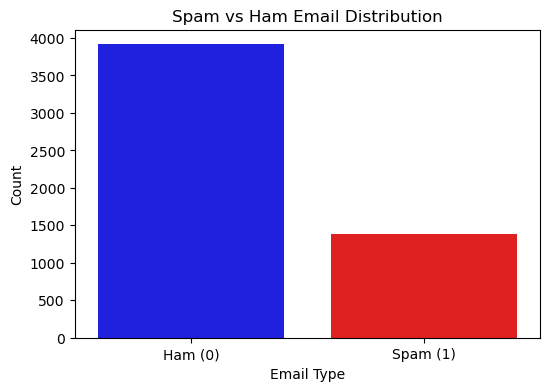

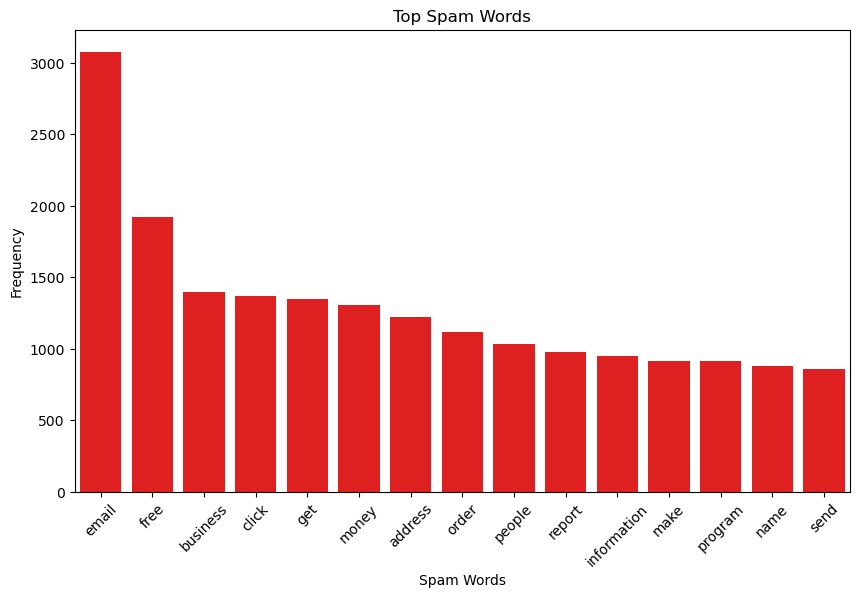

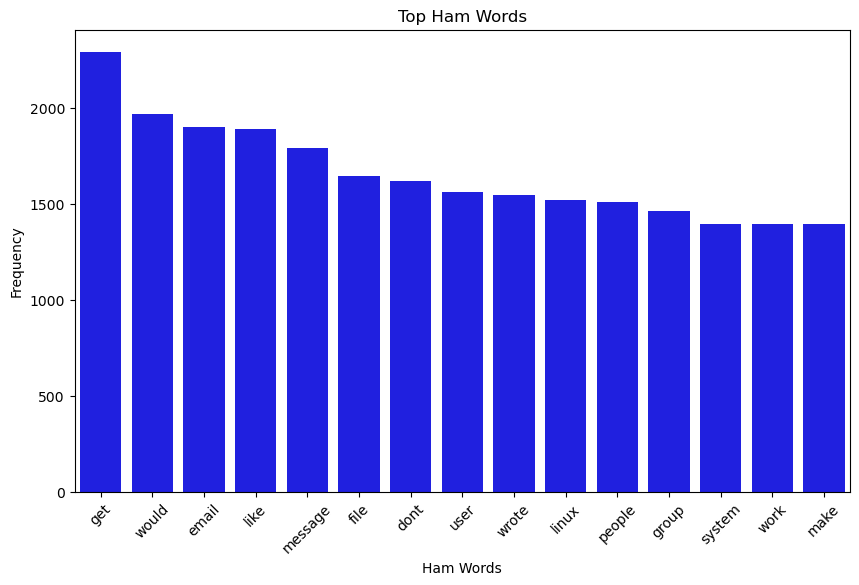

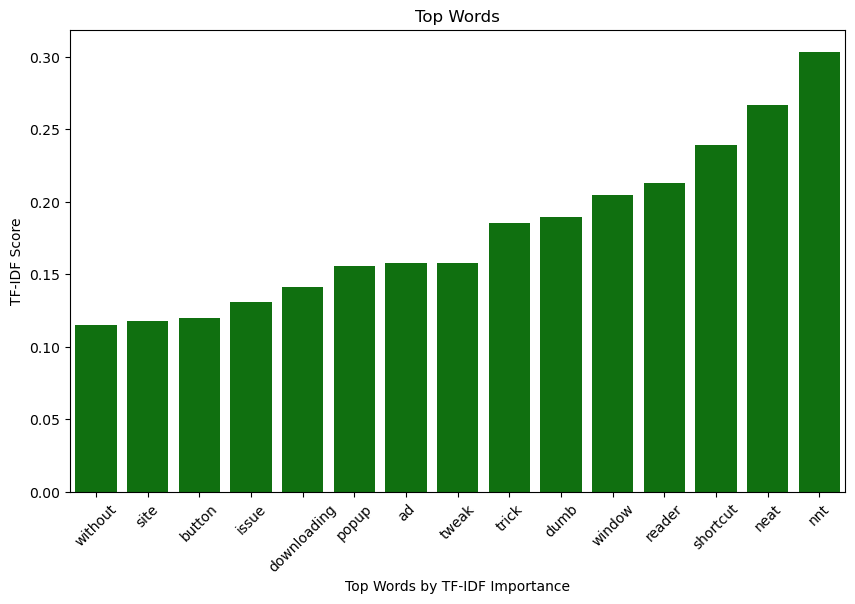

<Figure size 600x600 with 0 Axes>

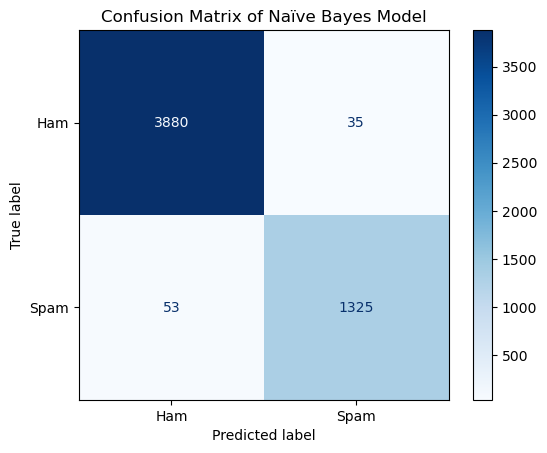

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Spam vs Ham count plot
plt.figure(figsize=(6, 4))
sns.barplot(x=df_cleaned["Label"].value_counts().index, y=df_cleaned["Label"].value_counts().values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Ham (0)", "Spam (1)"])
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.title("Spam vs Ham Email Distribution")
plt.show()

spam_df = pd.DataFrame(top_spam_words, columns=["Word", "Count"])
ham_df = pd.DataFrame(top_ham_words, columns=["Word", "Count"])

# Plot top spam words
plt.figure(figsize=(10, 6))
sns.barplot(x=spam_df["Word"][:15], y=spam_df["Count"][:15], color="Red")
plt.xticks(rotation=45)
plt.xlabel("Spam Words")
plt.ylabel("Frequency")
plt.title("Top Spam Words")
plt.show()

# Plot top ham words
plt.figure(figsize=(10, 6))
sns.barplot(x=ham_df["Word"][:15], y=ham_df["Count"][:15], color="Blue")
plt.xticks(rotation=45)
plt.xlabel("Ham Words")
plt.ylabel("Frequency")
plt.title("Top Ham Words")
plt.show()

# Get the top words with highest TF-IDF scores
feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(X.toarray()).flatten()[-15:] # Top 15 words

# plot the top words
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_array[tfidf_sorting], y=np.sort(X.toarray()).flatten()[-15:], color="Green")
plt.xticks(rotation=45)
plt.xlabel("Top Words by TF-IDF Importance")
plt.ylabel("TF-IDF Score")
plt.title("Top Words")
plt.show()

# Generate Confusion Matrix
cm = confusion_matrix(df_cleaned["Label"], df_cleaned["Predicted_Label"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix of Naïve Bayes Model")
plt.show()


12. **Model Validation:** 

*Validate the model using appropriate metrics and methods.*


In [ ]:
# code goes here as applicable


13. **Analysis:** 

*Analyze the results in the context of the project's objectives.*


In [ ]:
# code goes here as applicable


14. **Error Estimation:** 

*Estimate the model's error and discuss potential sources of error.*


In [ ]:
# code goes here as applicable


15. **Model Improvement:** 

*Suggest ways to improve the model based on the analysis.*


In [ ]:
# code goes here as applicable


16. **Final Conclusion:** 

*Summarize the findings and discuss their implications.*